In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# helper function for loading expression data
from src.load_data import load_expression_data

In [3]:
# load tab-separated RNA sequence expression data
# preview first few rows to ensure loading worked
# rows indicate gene names
df = pd.read_csv("../data/expression_data.csv", sep="\t")
df.head()


,gene_id,gene_name,SH_INSM1,SH_INSM2,SH_LacZ1,SH_LacZ2
0,ENSG00000000003.16,TSPAN6,15.760504,14.069353,11.615006,17.989833
1,ENSG00000000005.6,TNMD,0.000000,0.000000,0.000000,0.000000
2,ENSG00000000419.14,DPM1,80.633244,87.540904,102.014999,131.561480
3,ENSG00000000457.14,SCYL3,13.443670,12.867774,9.574811,14.888454
4,ENSG00000000460.17,FIRRM,8.731815,11.637812,14.164938,27.110533


In [4]:
# check dimensions of dataset
df.shape
df.columns

Index(['gene_id', 'gene_name', 'SH_INSM1', 'SH_INSM2', 'SH_LacZ1', 'SH_LacZ2'], dtype='object')

In [5]:
# set gene names as the index
df = df.set_index("gene_name")

# save IDs as reference for genes
gene_ids = df["gene_id"]

# keep only expression columns
df = df.drop(columns=["gene_id"])


In [6]:
# handle non-numeric values by converting them to numeric
df = df.apply(pd.to_numeric, errors="coerce")

# fill remaining values with 0
if df.isnull().any().any():
    df = df.fillna(0)


In [7]:
# calculate mean expression for each gene across all samples
# keep genes with a mean greater than 1
gene_means = df.mean(axis=1)
df_filtered = df.loc[gene_means > 1]


In [8]:
# apply log(x+1) to handle variance and skew
df_log = np.log1p(df_filtered)


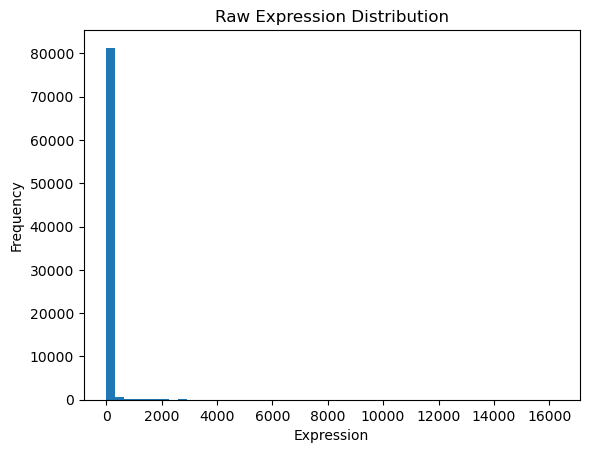

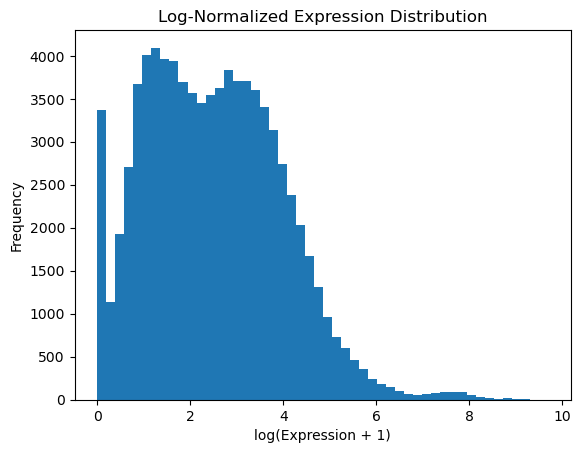

In [9]:
# plot raw expression values
plt.figure()
plt.hist(df_filtered.values.flatten(), bins=50)
plt.title("Raw Expression Distribution")
plt.xlabel("Expression")
plt.ylabel("Frequency")
plt.show()

# plot log-normalized expression values
plt.figure()
plt.hist(df_log.values.flatten(), bins=50)
plt.title("Log-Normalized Expression Distribution")
plt.xlabel("log(Expression + 1)")
plt.ylabel("Frequency")
plt.show()


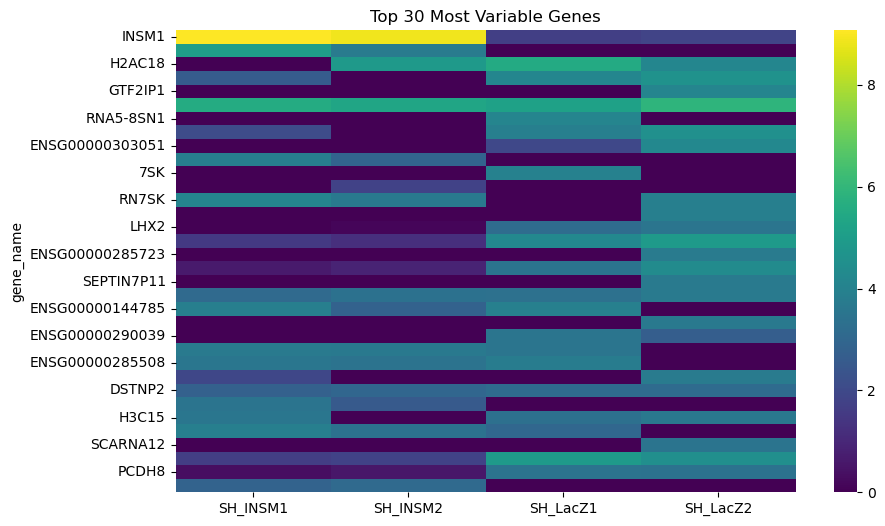

In [10]:
# calculate variance of genes across samples
gene_variance = df_log.var(axis=1)
# get top 30 most variable genes and create a headmap
top_genes = gene_variance.sort_values(ascending=False).head(30).index

plt.figure(figsize=(10, 6))
sns.heatmap(df_log.loc[top_genes], cmap="viridis")
plt.title("Top 30 Most Variable Genes")
plt.show()


In [11]:
# save cleaned data for reuse
df_log.to_csv("../data/expression_cleaned_log.csv")
